<a href="https://colab.research.google.com/github/daonly/personal/blob/main/%5B%EB%8D%B0%EA%B3%BC%EC%9D%B8%5D%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%ED%95%99%EC%8A%B5_%EC%9D%B4%EB%8B%A4%EC%98%A8%20%EC%A1%B0%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터과학과인공지능 7분반 실습
Written by Daon Lee (onlyforres@gmail.com) on 09/25/2024

# **[신경망 학습]**

- 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

# 손실함수

- 신경망 학습에서 사용하는 지표

## 오차제곱합 --> 회귀 문제

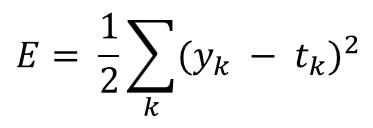

- 원-핫 인코딩: 정답 클래스 위치만 1로 하고, 그 외는 0으로 나타내는 표기법

In [ ]:
# 정답 3
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
import numpy as np

# 3번째에 높은 확률 --> 낮은 오차
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

# 엉뚱하게 8번째에 높은 확률 --> 높은 오차
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


## 교차 엔트로피 오차 --> 분류 문제

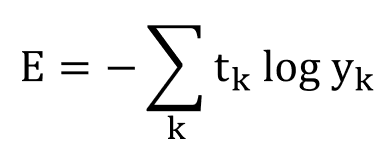

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7 # log(0)이 되어 생기는 오류를 방지하기 위함
    return -np.sum(t * np.log(y + delta))

In [ ]:
# 정답 3
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 3번째에 높은 확률 --> 낮은 오차
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 엉뚱하게 8번째에 높은 확률 --> 높은 오차
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


## 미니배치 학습 - MNIST

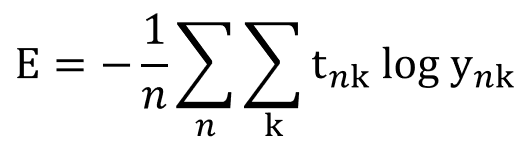

- 훈련 데이터 전체에 대한 손실 함수를 계산하기에는 시간이 오래 걸리기 때문에 일부를 추려 전체의 근사치로 이용할 수 있다.

In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# folder = '데과인'
folder = ''

In [10]:
import sys, os
sys.path.append(f'/content/drive/MyDrive/{folder}')

import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # 원-핫 인코딩 된 정답 레이블 (60000, 10)

(60000, 784)
(60000, 10)


In [ ]:
np.random.choice(60000, 10)

array([ 7850, 47043, 29962, 13253,  8549, 16151, 59688, 30390,  6328,
        2515])

(배치용) 교차 엔트로피 오차 구현하기

In [ ]:
# 원핫인코딩 했을 때
def cross_entropy_error_with_onehot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
# 원핫인코딩 안 했을 떄
def cross_entropy_error_wihtout_onehot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size, t)] + 1e-7)) / batch_size

In [ ]:
t_batch # 주신 데이터는 원핫 인코딩 되어있음 --> 첫번째꺼 사용

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## 손실함수는 왜 사용해야 하는가?

- 높은 정확도를 목표로 한다면 정확도를 모델 학습의 지표로 사용하면 안되는가?
- 정확도를 사용하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문
- 앞서 본 오차제곱합, 교차 엔트로피 오차, 등등 대부분의 손실함수는 연속형

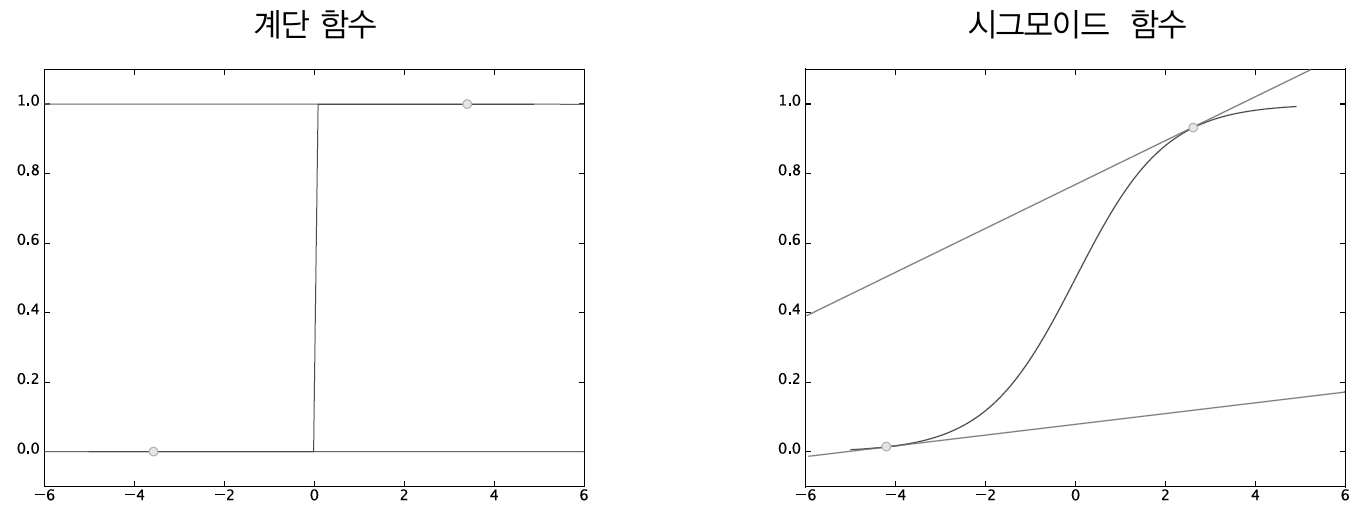

# 수치 미분

- 신경망 학습을 하는 과정은 결국 손실함수를 최소화하는 매개변수를 찾는 과정
- 손실함수를 최소화하기 위해서는 어떻게 해야하는가?

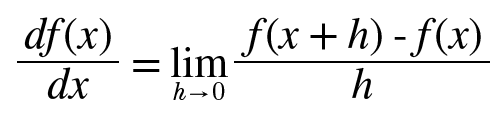

- 위 수식은 전방 차분으로 일반적으로 생각하는 미분 수식

In [ ]:
# 나쁜 구현
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [ ]:
# h값이 너무 작아 반올림 오차를 일으킬 수 있음. 그냥 0으로 수렵되버림 ㅇㅇ. 10e-4정도가 적당하다고 알려짐.
np.float32(1e-50)

0.0

- 딥러닝에서는 전방 차분보다는 중심 차분(중앙 차분)을 사용해서 수치 미분 오차를 줄이고자 함

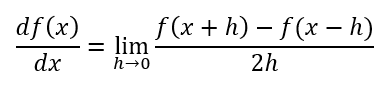

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h)

- 예시

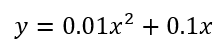

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

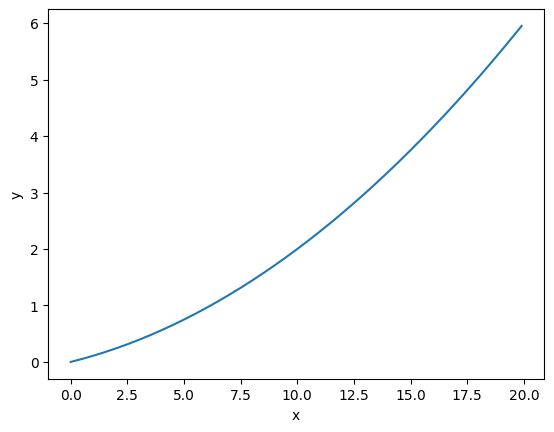

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [ ]:
# dy/dx

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


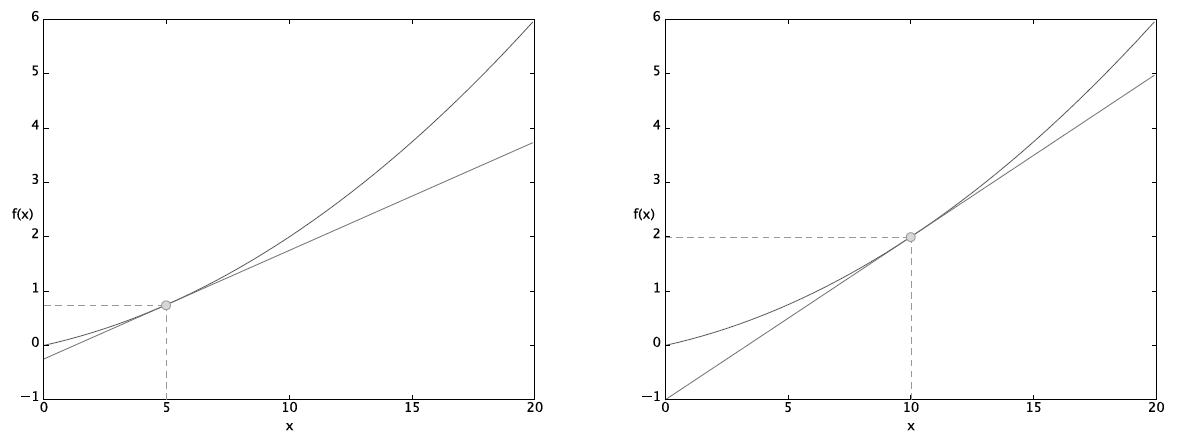

- 편미분 : 여러 변수들 중 하나에 대해서 미분하고, 나머지는 상수로 취급하는 것

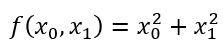

In [ ]:
def function_2(x):  # x는 벡터 단위로 들어오게 됨
    return x[0]**2 + x[1]**2

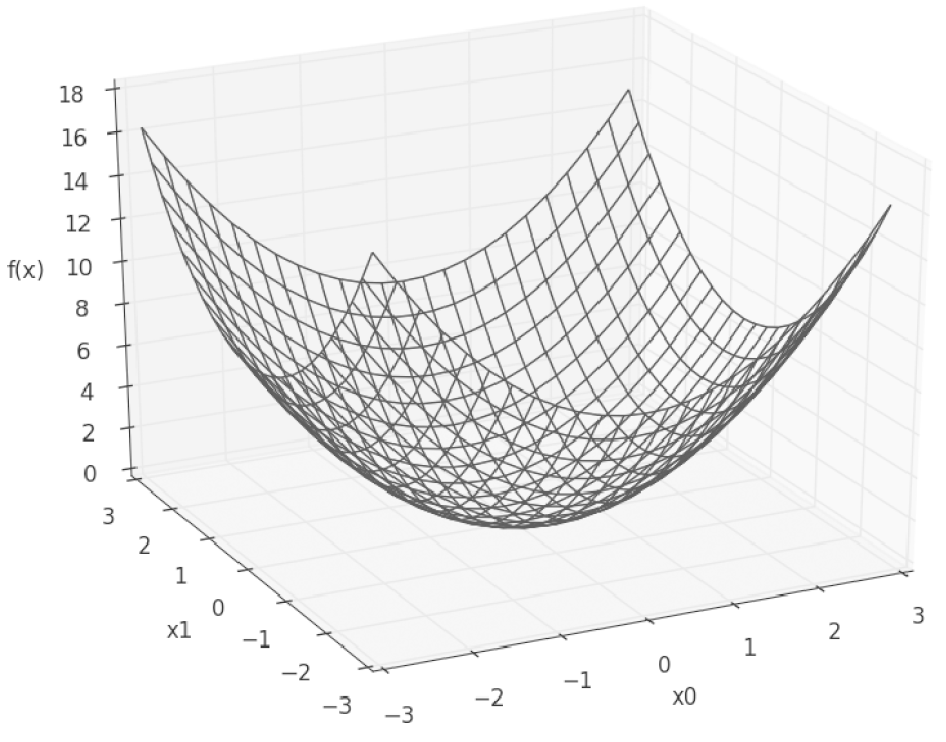

In [ ]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

# dy / dx_0 = 2*x0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [ ]:
# x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

# dy/ dx_1 = 2*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

- 미분하고자 하는 변수는 유지하고, 나머지 변수는 상수 취급
- 이렇게 변수 별로 따로 계산해야할까? 함께 계산하고 싶다면?

# 기울기

- x0, x1의 편미분을 동시에 계산하고 싶다면?
- x0 = 3, x1 = 4일 때 (x0, x1) 양쪽의 편미분을 묶어 벡터로 정리한 것을 기울기(gradient)라고 한다.

In [ ]:
# 기울기
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

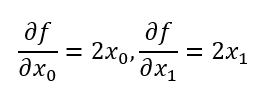

In [ ]:
def function_2(x): return x[0]**2 + x[1]**2

In [ ]:
# 입력된 값들이 다 벡터라 방향성을 가지므로 화살표로 표현됨.

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


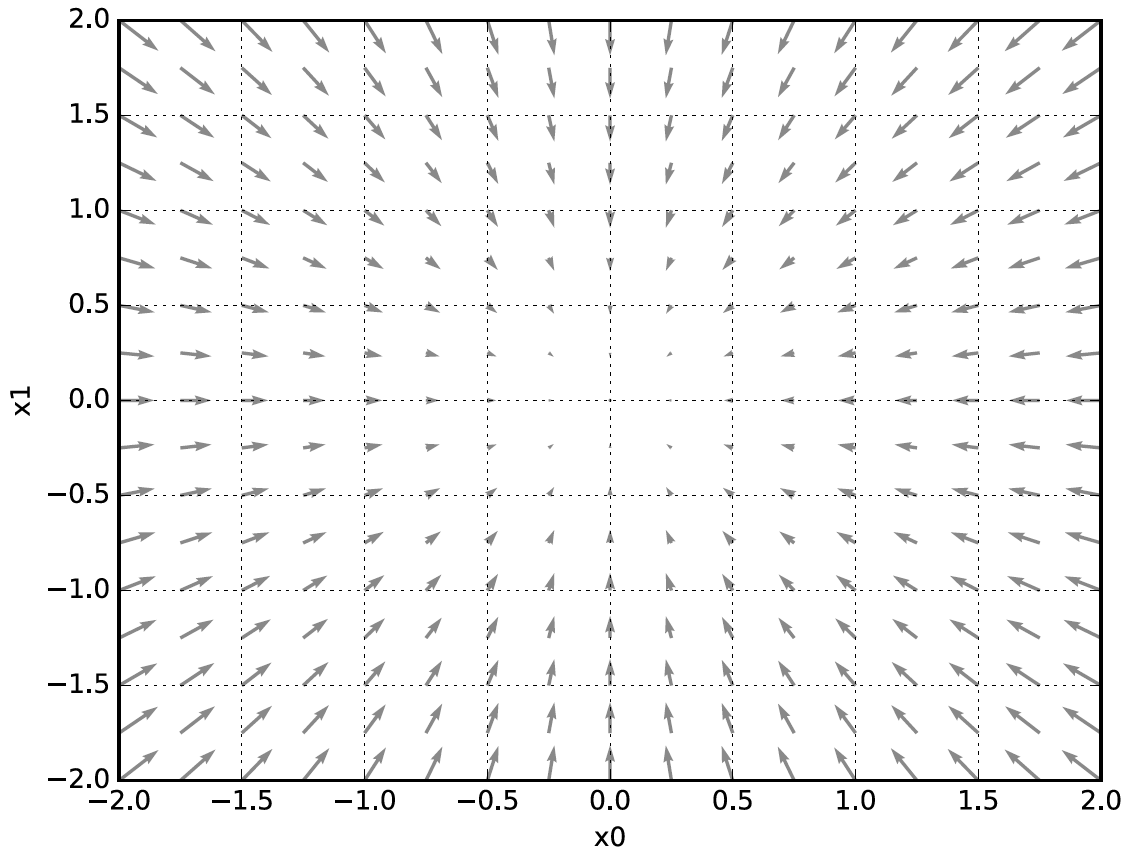

# 경사하강법

- 기울기를 잘 이용해서 손실 함수의 최솟값을 찾아보자!

- 경사하강법 수식

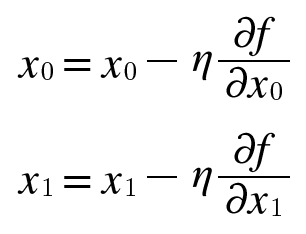

- η : 학습률 (갱신하는 양). hyperparameter.

In [ ]:
# f:최적화하려는 함수
# init_x : 초깃값
# lr : 학습률
# step_num : 반복횟수

def gradient_descent(f, init_x, lr=0.01, step_num=100): #설정된 값들은 default 값들임.
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num=100)  #학습률을 0.1로 하니 얼추 0, 0 잘 찾아감.

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
# 학습률이 너무 큰 예 : lr = 10.0 --> 발산함
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
# 학습률이 너무 작은 예 : lr = 1e-10 --> 거의 변화 없음
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num=100)

array([-2.99999994,  3.99999992])

- 실용적으로 활용할 때는 처음엔 높은 학습률, 학습이 진행될수록 낮은 학습률이 되도록 설정 -> learning rate decay

# 신경망에서의 기울기

- 전제

    신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.

- 1단계 - 미니배치

    훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실함수 값을 줄이는 것이 목표이다.

- 2단계 - 기울기 산출

    미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

- 3단계 - 매개변수 갱신

    가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

- 4단계 - 반복

    1~3단계를 반복한다.

- 데이터를 무작위로 선정하기 때문에 확률적 경사 하강법stochastic gradient descent,
SGD라고 부른다.


++ 필요 함수들 정의

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [17]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [18]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()

    return grad

In [24]:
######### 오차역전파법 ####### : sigmoid에 대한 오차역전파법. 다음 실습 때 쓰일 수도 ㅇㅇ.
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

# 학습 알고리즘 구현해보기

In [11]:
class TwoLayerNet:
    """
    params : 신경망의 매개변수를 보관하는 딕셔너리 변수.
    params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향.
    params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향.

    grad : 기울기를 보관하는 딕셔너리 변수(numerical_gradient()의 반환값)
    grads['W1']은 1번째 층의 가중치의 기울기, grads['b1']은 1번째 층의 편향의 기울기.
    grads['W2']은 2번째 층의 가중치의 기울기, grads['b2']은 2번째 층의 편향의 기울기.
    """
    # 초기화를 수행. input은 데이터의 크기, output size는 예측해야 할 class의 개수.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 매개변수 초기화 : 편향은 0으로, 가중치는 random으로 시작함. 이거 말고도 다양한 초기화 방법 존재.
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다. 이게 2층짜리 딥러닝 구조의 전부.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다. 결과가 나올 때 학습이 잘 이루어졌는지 볼 수 있는 지표.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    # x : 입력 데이터, t : 정답 레이블
    # 이게 loss로 나온 결과를 수치미분하여 저장할 수 있는 코드.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [12]:
# 데이터의 크기 784, 예측해야 할 class의 개수는 10
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [19]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [20]:
import numpy as np
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t) ########### 실행하는데 오래 걸림 #################

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


# 미니배치 학습 구현


In [22]:
# 무작위 10개 추출 - mini batch의 size를 결정하는 것.
train_size = x_train.shape[0] # 60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [25]:
import sys, os
sys.path.append(f'/content/drive/MyDrive/{folder}')

import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)  6만장이고, 784의 크기를 갖고 있음.
print(t_train.shape) # 원-핫 인코딩 된 정답 레이블 (60000, 10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
# 하이퍼파라미터
iters_num = 10000  # 이걸 설정해도 되고, epoch을 설정해줘도 됨.
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1  # 학습률 안 줄이고 계속 0.1 하나로 진행.

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)  # 두 개의 층을 갖는 딥러닝 구조.

for i in range(iters_num):  # 이 iteration 수만큼 반복하게 됨.
    batch_mask = np.random.choice(train_size, batch_size)  # 랜덤하게 뽑힌 100개를 사용. 근데 이거 하면 데이터가 반복될 수 있어서, 실제로 할 땐 batch를 안 겹치게 뽑는 다른 코드 사용함.
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    # 경사하강법을 통해 파라미터를 업데이트하는 단계
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:  # 몇번 돌 때마다 정확도 등의 정보를 뽑아낼 건지.
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |" + str(train_acc) + "," + str(test_acc))

(60000, 784)
(60000, 10)
train acc, test acc |0.09871666666666666,0.098
train acc, test acc |0.7740833333333333,0.7791
train acc, test acc |0.8775833333333334,0.8804
train acc, test acc |0.8987833333333334,0.9027
train acc, test acc |0.909,0.9116
train acc, test acc |0.915,0.917
train acc, test acc |0.91985,0.9219
train acc, test acc |0.9248,0.9274
train acc, test acc |0.92855,0.9295
train acc, test acc |0.9314166666666667,0.9333
train acc, test acc |0.9342833333333334,0.9348
train acc, test acc |0.9370166666666667,0.9366
train acc, test acc |0.9403166666666667,0.94
train acc, test acc |0.9422,0.9406
train acc, test acc |0.9434,0.9432
train acc, test acc |0.9458666666666666,0.9444
train acc, test acc |0.9470333333333333,0.9451
